# <u>BIKE PRICE PREDICTION</u>

## Import Dependencies

In [1]:
import pandas as pd

In [2]:
import numpy as np

## Import Data

In [3]:
data = pd.read_csv('Dataset/Bike Prices.csv')

## Process & Analyze Data

### Get first 5 rows of DataFrame

In [5]:
data.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


### Get info of DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


### Drop missing values

In [7]:
data = data.dropna()

### Get summary statistics

In [9]:
data.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


### Get categories and count of categorical variables

In [10]:
data['Brand'].value_counts()

Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
Activa        3
UM            3
Vespa         2
Harley        2
Benelli       1
Yo            1
Hyosung       1
BMW           1
Name: Brand, dtype: int64

In [11]:
data['Model'].value_counts()

Honda Activa [2000-2015]      23
Honda CB Hornet 160R          22
Bajaj Pulsar 180              20
Bajaj Discover 125            16
Yamaha FZ S V 2.0             16
                              ..
TVS Radeon                     1
Hero  Ignitor Disc             1
Bajaj V12                      1
Yamaha Cygnus Ray ZR           1
Harley-Davidson Street Bob     1
Name: Model, Length: 183, dtype: int64

In [12]:
data['Seller_Type'].value_counts()

Individual    623
Dealer          3
Name: Seller_Type, dtype: int64

In [13]:
data['Owner'].value_counts()

1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
Name: Owner, dtype: int64

### Get column names

In [14]:
data.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

### Get shape of DataFrame

In [15]:
data.shape

(626, 8)

### Encoding Categorical variables

In [17]:
data.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace = True)

In [18]:
data.replace({'Owner': {'1st owner': 0, '2nd owner': 1, '3rd owner': 2, '4th owner': 3}}, inplace = True)

## Split Dataset

In [19]:
y = data['Selling_Price']

In [20]:
y.shape

(626,)

In [21]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [23]:
X = data.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [24]:
X.shape

(626, 5)

In [27]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


### Get Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12529)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

## Train Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

## Get Model Prediction

In [34]:
y_pred = lr.predict(X_test)

In [35]:
y_pred.shape

(188,)

In [36]:
y_pred

array([ 52652.60893424,  39486.41676177, 196562.43198613,  55580.50406349,
        26140.72948171,  94608.16940208, 119187.31851383,  68882.36906451,
        33660.46971134,  46944.42315337,  53461.39448304,  11010.80661865,
        33332.52261296,  99136.8501725 ,  53520.69363008,  77889.9266744 ,
        45898.51705696,  51568.32996293,  23936.19734584,  53169.0782173 ,
        93240.71089045,   -982.0590174 ,  72782.26710893,  61648.18639176,
        60975.53326568,  29005.69236303,  52733.45578054,  76744.27220674,
        25899.12686656,  38977.38046564, 136552.24672467,  43207.37077005,
        59999.13518359, 178300.5207943 ,  56538.55902123,  21881.41938332,
        39242.90242198,  32072.27344397,  54250.50343729,  39760.72648089,
        58983.84447849,  30360.33221384,  53733.14061812,  39812.75115882,
       135490.92768475,  44412.40326892,   7898.88343968,  52017.36847526,
        42026.43374389, 104169.26650704,  60024.05156229, 101703.69488339,
        73823.40634504,  

## Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mean_squared_error(y_test, y_pred)

280339916.8981938

In [39]:
mean_absolute_error(y_test, y_pred)

11298.505848534465

In [40]:
r2_score(y_test, y_pred)

0.847323820928326

## Visualization of Actual vs Predicted Results

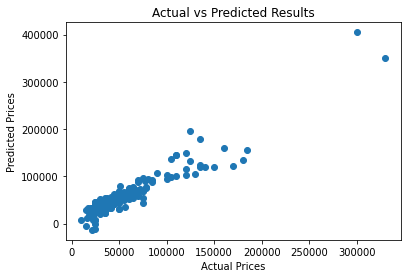

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Results')
plt.show()

## Get Future Pedictions

In [53]:
data_new = data.sample()

In [54]:
data_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
58,Honda,Honda Activa [2000-2015],25000,2012,0,0,40000,50267.0


In [55]:
data_new.shape

(1, 8)

In [56]:
X_new = data_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [57]:
y_pred_new = lr.predict(X_new)

In [58]:
y_pred_new

array([21998.34908292])